In [1]:
import pandas as pd
import numpy as np
import yaml
%matplotlib inline

In [2]:
with open("param.yaml", "r") as file:
    param = yaml.load(file.read())
param

{'forget_bias': 1.0,
 'learning_rate': 0.1,
 'length_of_sequences': 50,
 'num_of_hidden_nodes': 2,
 'num_of_input_nodes': 1,
 'num_of_output_nodes': 1,
 'num_of_prediction_epochs': 100,
 'num_of_training_epochs': 3000,
 'optimizer': 'GradientDescentOptimizer',
 'seed': 0,
 'size_of_mini_batch': 100,
 'train_data_path': '../train_data/normal.npy'}

In [3]:
train = np.load(param["train_data_path"])
train

array([[  0.00000000e+00,   1.25333234e-01],
       [  1.25333234e-01,   2.48689887e-01],
       [  2.48689887e-01,   3.68124553e-01],
       ..., 
       [ -3.68124553e-01,  -2.48689887e-01],
       [ -2.48689887e-01,  -1.25333234e-01],
       [ -1.25333234e-01,   3.92877345e-15]])

In [4]:
initial = np.load("initial.npy")
initial

array([  0.00000000e+00,   1.25333234e-01,   2.48689887e-01,
         3.68124553e-01,   4.81753674e-01,   5.87785252e-01,
         6.84547106e-01,   7.70513243e-01,   8.44327926e-01,
         9.04827052e-01,   9.51056516e-01,   9.82287251e-01,
         9.98026728e-01,   9.98026728e-01,   9.82287251e-01,
         9.51056516e-01,   9.04827052e-01,   8.44327926e-01,
         7.70513243e-01,   6.84547106e-01,   5.87785252e-01,
         4.81753674e-01,   3.68124553e-01,   2.48689887e-01,
         1.25333234e-01,  -3.21624530e-16,  -1.25333234e-01,
        -2.48689887e-01,  -3.68124553e-01,  -4.81753674e-01,
        -5.87785252e-01,  -6.84547106e-01,  -7.70513243e-01,
        -8.44327926e-01,  -9.04827052e-01,  -9.51056516e-01,
        -9.82287251e-01,  -9.98026728e-01,  -9.98026728e-01,
        -9.82287251e-01,  -9.51056516e-01,  -9.04827052e-01,
        -8.44327926e-01,  -7.70513243e-01,  -6.84547106e-01,
        -5.87785252e-01,  -4.81753674e-01,  -3.68124553e-01,
        -2.48689887e-01,

In [5]:
output = np.load("output.npy")
output

array([-0.01163007,  0.11507505,  0.24011663,  0.3597368 ,  0.47010452,
        0.56773204,  0.64985275,  0.71461999,  0.76108688,  0.78901577,
        0.79862201,  0.79034865,  0.76473933,  0.72243309,  0.6642651 ,
        0.59141982,  0.5055337 ,  0.40864086,  0.3029201 ,  0.19036371,
        0.07259029, -0.04903597, -0.17303729, -0.2974163 , -0.41942739,
       -0.53565294, -0.6423946 , -0.73625678, -0.81470472, -0.87637764,
       -0.92107219, -0.94947195, -0.96278471, -0.96241534, -0.94973975,
       -0.92597461, -0.89212275, -0.84896779, -0.79709655, -0.73693907,
       -0.6688205 , -0.59302258, -0.50985676, -0.41975048, -0.32334602,
       -0.2216067 , -0.11591803, -0.00815967,  0.0992815 ,  0.20358637,
        0.3016789 ,  0.39047939,  0.46718192,  0.52948153,  0.57569683,
        0.60477555,  0.61621398,  0.60995072,  0.58629096,  0.5458895 ,
        0.48978436,  0.41942894,  0.33665282,  0.24351186,  0.14207268,
        0.03425908, -0.07812446, -0.19318894, -0.30869773, -0.42

In [6]:
losses = np.load("losses.npy")
losses

array([[  1.00000000e+01,   5.21649063e-01],
       [  2.00000000e+01,   4.98259187e-01],
       [  3.00000000e+01,   5.12061834e-01],
       [  4.00000000e+01,   5.08497775e-01],
       [  5.00000000e+01,   3.76984179e-01],
       [  6.00000000e+01,   2.86902398e-01],
       [  7.00000000e+01,   2.23010182e-01],
       [  8.00000000e+01,   1.33334279e-01],
       [  9.00000000e+01,   1.09339476e-01],
       [  1.00000000e+02,   7.91212395e-02],
       [  1.10000000e+02,   6.07259162e-02],
       [  1.20000000e+02,   4.49932814e-02],
       [  1.30000000e+02,   3.70537601e-02],
       [  1.40000000e+02,   3.04589123e-02],
       [  1.50000000e+02,   2.42561046e-02],
       [  1.60000000e+02,   1.85057689e-02],
       [  1.70000000e+02,   1.69574283e-02],
       [  1.80000000e+02,   1.47507051e-02],
       [  1.90000000e+02,   1.35333249e-02],
       [  2.00000000e+02,   1.27079748e-02],
       [  2.10000000e+02,   1.12369396e-02],
       [  2.20000000e+02,   9.53455735e-03],
       [  

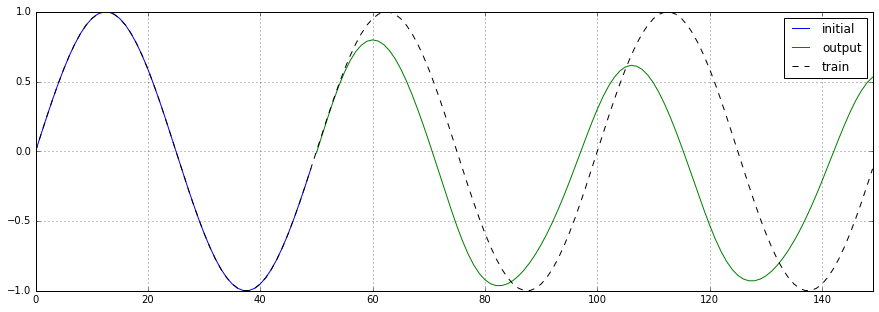

In [7]:
train_df = pd.DataFrame(train[:len(initial) + len(output), 0], columns=["train"])
initial_df = pd.DataFrame(initial, columns=["initial"])
output_df = pd.DataFrame(output, columns=["output"], index=range(len(initial), len(initial) + len(output)))
merged = pd.concat([train_df, initial_df, output_df])
merged.plot(figsize=(15, 5), grid=True, style=["-", "-", "k--"])

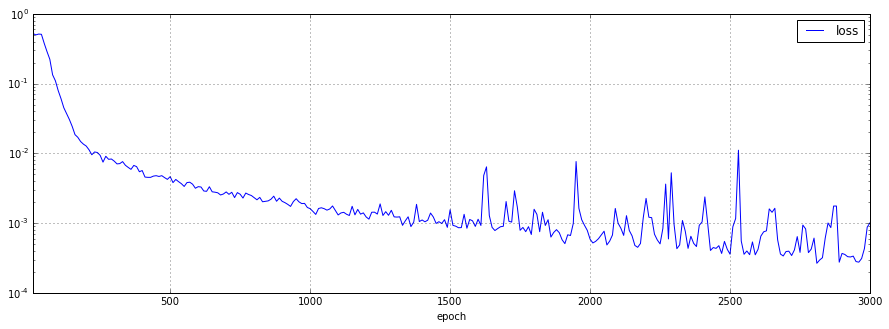

In [8]:
losses_df = pd.DataFrame(losses, columns=["epoch", "loss"])
losses_df.plot(figsize=(15, 5), grid=True, logy=True, x="epoch")